Name: DANISH KAUR


TASK #2 PREDICTION USING UNSUPERVISED ML


Objective: For the given 'Iris' dataset,predict the optimum number of clusters and represent it visually.

Dataset:https://bit.ly/3kXTdox

In [ ]:
#importing Libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import datasets
import seaborn as sns



In [3]:
data = pd.read_csv("C:/Users/ASUS/Desktop/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#To print all the null values present in our data set

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [9]:
# To check the correlation; Heatmap and manual method can be used
b = data.corr()
b


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


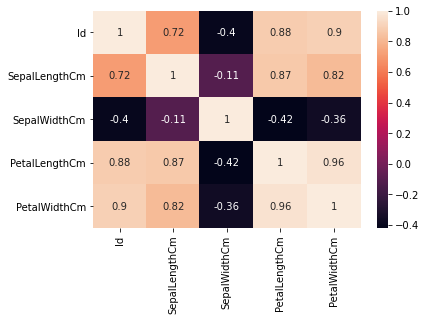

In [10]:
#Heatmap Presentation
sns.heatmap(b, annot =True)

In [22]:
#Identify Unique Species of Iris & Print the sum count of eachone.
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
print("SumCount for Iris Species")
data["Species"].value_counts()

SumCount for Iris Species


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

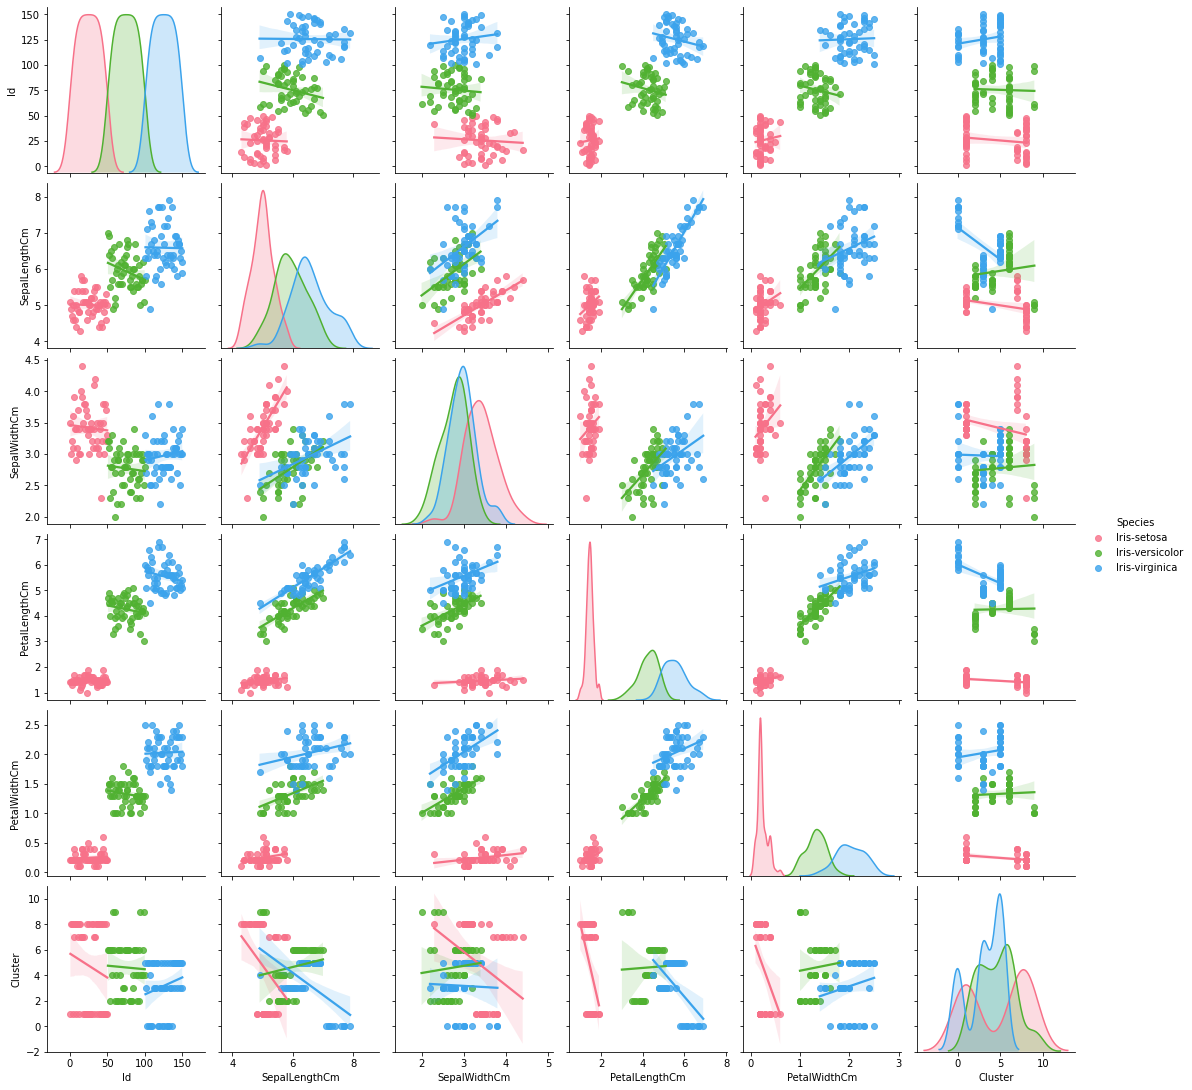

In [24]:
sns.pairplot(data, hue="Species", palette="husl", diag_kind="kde",kind='reg')

In [25]:
from sklearn.cluster import KMeans

x = data.drop(["Id", "Species"], axis = 1)

#Creating array to store the inertia values
inertias = []
# Creating an array to store the models's scores
scores = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    scores.append(kmeans.fit(x).score(x))
    inertias.append(kmeans.inertia_)

print(inertias[0:10])
print(scores[0:10])
    


[1729.5977333333328, 926.7387048665616, 471.6021449842673, 256.45112146725046, 130.11570211038958, 103.4231411655873, 77.5780480919942, 53.47523559199423, 39.02348559199421, 25.955497086247092]
[-1729.5977333333328, -926.7387048665615, -471.60214498426734, -256.4511214672504, -130.11570211038958, -103.4231411655873, -77.5780480919942, -53.47523559199424, -39.023485591994216, -25.955497086247092]


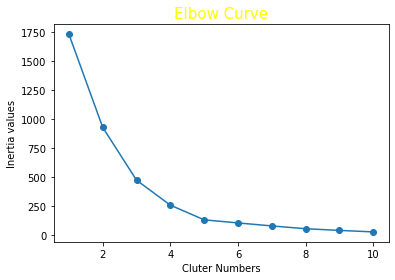

In [26]:
#Ploting elbow curve
plt.plot(range(1,11), inertias,"-o")
plt.xlabel("Cluter Numbers")
plt.ylabel("Inertia values")
plt.title("Elbow Curve", color='yellow', fontsize=15)
plt.show()

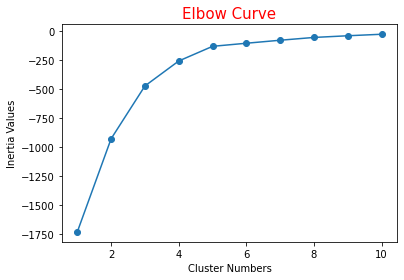

In [27]:
plt.plot(range(1,11),scores,"-o")
plt.xlabel("Cluster Numbers")
plt.ylabel("Inertia Values")
plt.title("Elbow Curve", color='red', fontsize=15)
plt.show()

In [28]:
#Training the module with the cluster size of 3

#Aplying kmean
kmean = KMeans(n_clusters = 3, init = 'k-means++',
              max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[3 5 5 5 3 0 5 3 5 5 0 3 5 5 0 0 0 3 0 3 3 3 5 3 3 5 3 3 3 5 5 3 0 0 5 5 3
 5 5 3 3 5 5 3 3 5 3 5 3 3 7 7 7 2 7 6 7 8 7 2 8 6 2 7 2 7 6 2 7 2 9 2 9 7
 7 7 7 7 7 2 2 2 2 9 6 7 7 7 6 2 6 7 2 8 6 6 6 7 8 6 1 9 4 1 1 4 6 4 1 4 1
 9 1 9 9 1 1 4 4 9 1 9 4 9 1 4 9 9 1 4 4 4 1 9 9 4 1 1 9 1 1 1 9 1 1 1 9 1
 1 9]


In [29]:
#storing data cluster label to DataFrame
data['Cluster'] = kmeans.labels_

In [30]:
#data.head()
#data.tail()


#creating an datafame to store the dtaas of three cluster values
data1 = data[data['Cluster']==0]
data2 = data[data['Cluster']==1]
data3 = data[data['Cluster']==2]

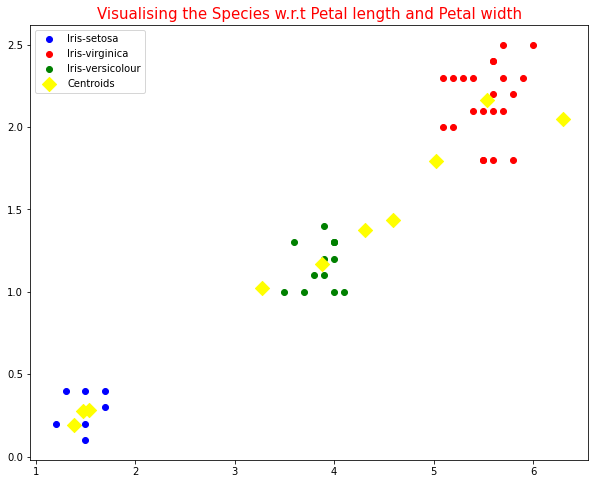

In [31]:
#Visualising the species w.r.t petal length and petal width
plt.figure(figsize=(10,8))
plt.scatter(data1['PetalLengthCm'], data1['PetalWidthCm'],color='blue',label ='Iris-setosa')
plt.scatter(data2['PetalLengthCm'], data2['PetalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(data3['PetalLengthCm'], data3['PetalWidthCm'],color='green',label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:,3],marker='D',color='yellow',label ='Centroids',s=100)
plt.title('Visualising the Species w.r.t Petal length and Petal width',color='Red',fontsize=15)
plt.legend()
plt.show()

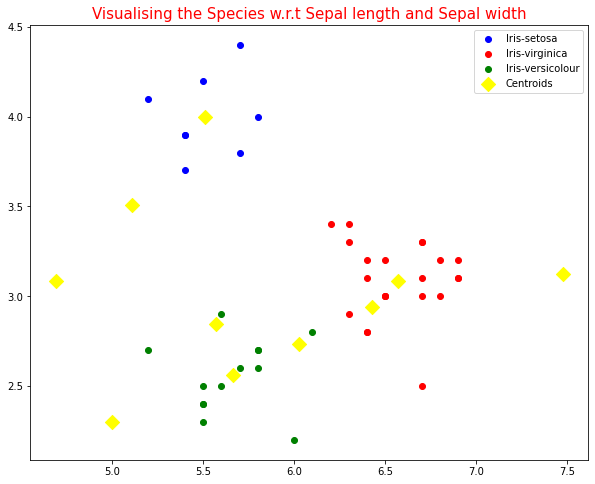

In [32]:
#Visualizing the species w.r.t sepal length and sepal width
plt.figure(figsize=(10,8))
plt.scatter(data1['SepalLengthCm'], data1['SepalWidthCm'],color='blue',label ='Iris-setosa')
plt.scatter(data2['SepalLengthCm'], data2['SepalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(data3['SepalLengthCm'], data3['SepalWidthCm'],color='green',label ='Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],marker='D',color='yellow',label ='Centroids',s=100)
plt.title('Visualising the Species w.r.t Sepal length and Sepal width', color='red',fontsize=15)
plt.legend()
plt.show()

# Thank You